In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
y, sr = librosa.load("D:/ex/cv_basic/음성/sample.wav", sr=16000)  # numpy array
print(y.shape, sr)

d:\2Anaconda\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
d:\2Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
d:\2Anaconda\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


(191680,) 16000


In [7]:
# 2. Mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

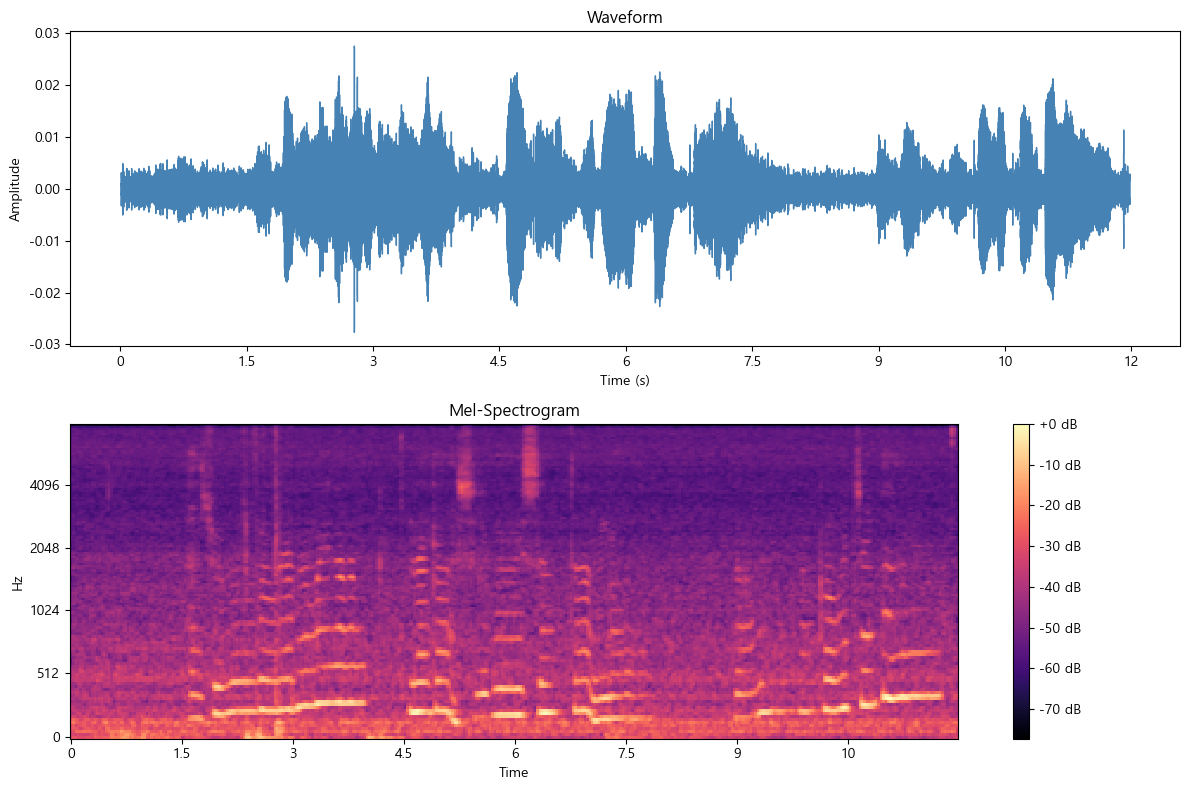

In [9]:
# 3. Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
# (a) Waveform
librosa.display.waveshow(y, sr=sr, ax=ax[0], color='steelblue')
ax[0].set_title("Waveform")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
# (b) Mel-Spectrogram
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=ax[1], cmap='magma')
ax[1].set_title("Mel-Spectrogram")
fig.colorbar(img, ax=ax[1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

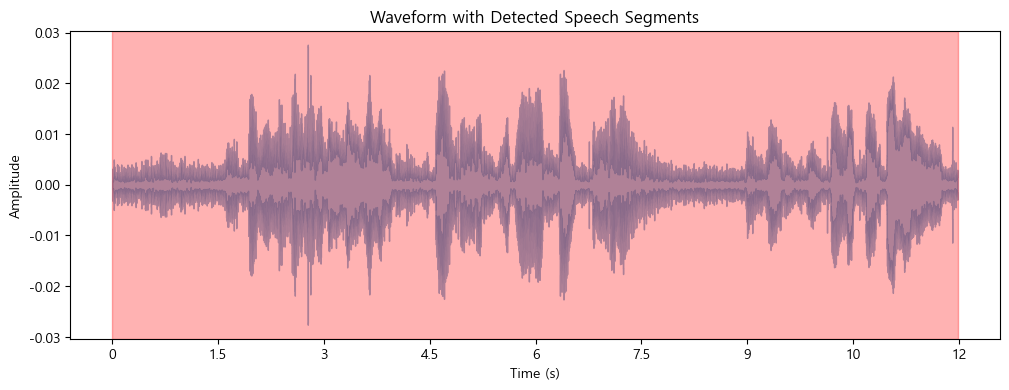

In [10]:
# 발화 구간 찾기 (threshold = -30 dB)
intervals = librosa.effects.split(y, top_db=30)

# 시각화
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
for (start, end) in intervals:
    plt.axvspan(start/sr, end/sr, color="red", alpha=0.3)  # 발화 구간 하이라이트
plt.title("Waveform with Detected Speech Segments")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()